# Modelos de clustering

In [1]:
%pylab
%matplotlib inline

Using matplotlib backend: MacOSX
Populating the interactive namespace from numpy and matplotlib


# Creación de un conjunto de datos

Creamos dos conjuntos de datos con 3 y 5 clusters para evaluar con K-means

In [2]:
from sklearn.datasets import make_blobs

color_map = array(['b','g','r','c','m','y','k','b','g','r',
                   'c','m','y','k','b','g','r','c','m','y',
                   'k','b','g','r','c','m','y','k'])

blobs_3, classes_3 = make_blobs(300,
                                centers      = 3,
                                cluster_std  = 0.5,
                                random_state = 0)
blobs_5, classes_5 = make_blobs(300,
                                centers      = 5,
                                cluster_std  = 0.5,
                                random_state = 0)

# K-means

El algoritmo de k-means es uno de los más utilizados para la segmentación de datos gracias a su simplicidad y a encontrarse implementado en muchas plataformas. En su contra tiene la desventaja de requerir el número de cluster en el que se ha de dividir los datos.

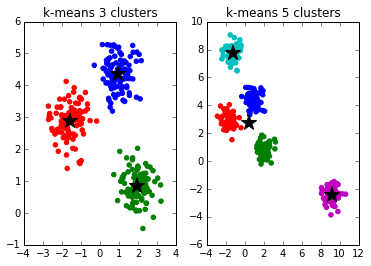

In [3]:
from sklearn.cluster import KMeans

def plot_kmeans(blobs, classes, n_clusters, figure_name):
    kmeans = KMeans(n_clusters = n_clusters).fit(blobs)
    scatter(blobs[:, 0], blobs[:, 1],
            color = color_map[classes])
    scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            marker = '*',
            s = 250,
            color = 'black')
    title(figure_name)

subplot(1, 2, 1)
plot_kmeans(blobs_3, classes_3, 3, 'k-means 3 clusters')
subplot(1, 2, 2)
plot_kmeans(blobs_5, classes_5, 3, 'k-means 5 clusters')

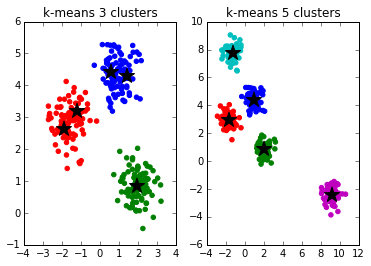

In [4]:
subplot(1, 2, 1)
plot_kmeans(blobs_3, classes_3, 5, 'k-means 3 clusters')
subplot(1, 2, 2)
plot_kmeans(blobs_5, classes_5, 5, 'k-means 5 clusters')

## `MiniBatchKMeans`

`MiniBatchKMean` es una implementación de k-means en la que se utiliza una muestra aleatoria en cada iteración. Esto provoca que `MiniBatchKMeans` converga de una forma más rápida, aunque la distorsión de en los clusters es mayor.

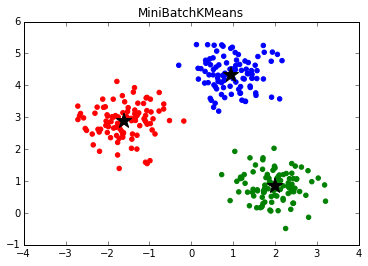

In [5]:
from sklearn.cluster import MiniBatchKMeans

kmeans = MiniBatchKMeans(n_clusters = 3).fit(blobs_3)

scatter(blobs_3[:, 0], blobs_3[:, 1], color = color_map[classes_3])
scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        marker = '*',
        s = 250,
        color = 'black')
title('MiniBatchKMeans')

# Obtención de número optimo de clusters

## Evaluación de la distorsión

En este método se utiliza la dispersión promedio de los grupos que ha seleccionado el método para diferentes valores de k. La dispersión ha de disminuir a medida que aumenta el número de culsters, pero una vez que se el valor optimo la mejora se reducirá.

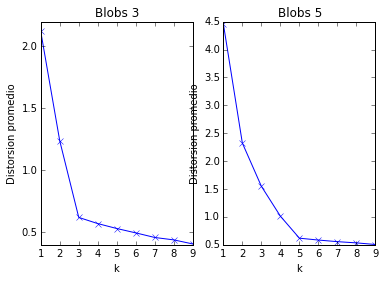

In [6]:
from scipy.spatial.distance import cdist

def plot_distorsion(x, figure_name, max_k = 10, n_init = 10):
    meandistortions = []

    for k in range(1, max_k):
        kmeans = KMeans(n_clusters = k, n_init = n_init).fit(x)
        meandistortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_,
                                                'euclidean'), axis = 1))
                               / x.shape[0])

    plot(range(1, max_k), meandistortions, 'bx-')
    xlabel('k')
    ylabel('Distorsion promedio')
    title(figure_name)

subplot(1, 2, 1)
plot_distorsion(blobs_3, 'Blobs 3')
subplot(1, 2, 2)
plot_distorsion(blobs_5, 'Blobs 5')

## Silhouette

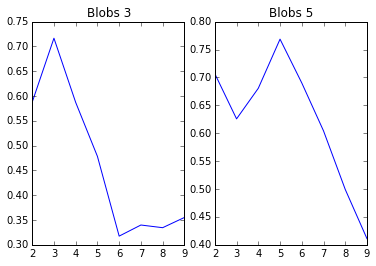

In [7]:
from sklearn.metrics import silhouette_score

def plot_sillhouette(blobs, figure_name, max_k = 10, n_init = 10):
    sillhouette_avgs = []
    
    for k in range(2, max_k):
        kmean = KMeans(n_clusters = k, n_init = n_init).fit(blobs)
        sillhouette_avgs.append(silhouette_score(blobs, kmean.labels_))
        
    plot(range(2, max_k), sillhouette_avgs)
    title(figure_name)

subplot(1, 2, 1)
plot_sillhouette(blobs_3, 'Blobs 3')
subplot(1, 2, 2)
plot_sillhouette(blobs_5, 'Blobs 5')

# Distancias

En los algoritmos de clustering se pueden utilizar diferentes distancias para medir la separación entre los puntos. Algunas de las distancia más utilizadas son:
* Euclídea
* Euclídea Normalizada
* Minkowski
* Coseno
* Correlación
* Geometría del taxista (city block o Manhattan)

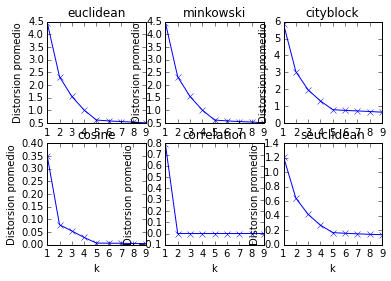

In [8]:
def plot_k_means_distance(x, figure_name):
    meandistortions = []

    for k in range(1, 10):
        kmeans = KMeans(n_clusters = k).fit(x)
        meandistortions.append(sum(np.min(cdist(x, kmeans.cluster_centers_, figure_name), axis = 1)) / x.shape[0])

    plot(range(1, 10), meandistortions, 'bx-')
    xlabel('k')
    ylabel('Distorsion promedio')
    title(figure_name)

subplot(2, 3, 1)
plot_k_means_distance(blobs_5, 'euclidean')
subplot(2, 3, 2)
plot_k_means_distance(blobs_5, 'minkowski')
subplot(2, 3, 3)
plot_k_means_distance(blobs_5, 'cityblock')
subplot(2, 3, 4)
plot_k_means_distance(blobs_5, 'cosine')
subplot(2, 3, 5)
plot_k_means_distance(blobs_5, 'correlation')
subplot(2, 3, 6)
plot_k_means_distance(blobs_5, 'seuclidean')

## Implementación de distancias en k-means

Actualmente no es posible modificar la distancia en utilizada para k-means en Scikit-learn. Pero en el caso de que la función de distancia tenga la misma media que la euclídea, como es el caso de la coseno, es posible modificarla.

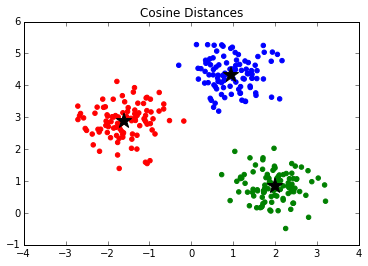

In [9]:
from sklearn.metrics.pairwise import cosine_similarity
def new_cosine_distances(X, Y=None, Y_norm_squared=None, squared=False):
    return cosine_similarity(X,Y)

# from sklearn import cluster
# cluster.k_means_.euclidean_distances = new_cosine_distances 

scatter(blobs_3[:, 0], blobs_3[:, 1], color = color_map[classes_3])
scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        marker = '*',
        s = 250,
        color = 'black')
title('Cosine Distances')

# Otros algortimos de clustering

## Propagación de afinidades ("Affinity Propagation")

En el algoritmo "Affinity Propagation" cada uno de los objetos a agrupar se considera un nodo de una red y todos ellos simultáneamente son considerados potenciales ejemplares. El funcionamiento general del algoritmo consiste en una transmisión de mensajes de forma recursiva con valores reales entre las aristas de la red, es decir, entre todos los pares de objetos hasta que los valores de los mensajes converjan.

Parámetros:
* damping [0.5, 1]
* preference 

Clusters:  3


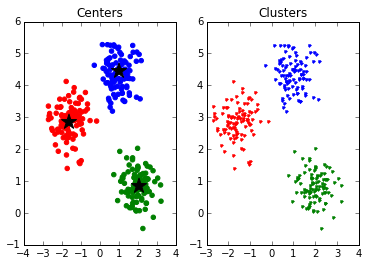

In [10]:
from sklearn.cluster import AffinityPropagation

af = AffinityPropagation(damping = 0.5, preference = -50).fit(blobs_3)

print "Clusters: ", len(af.cluster_centers_indices_)

subplot(1, 2, 1)
scatter(blobs_3[:, 0], blobs_3[:, 1], color = color_map[classes_3])
scatter(blobs_3[af.cluster_centers_indices_, 0],
        blobs_3[af.cluster_centers_indices_, 1],
        marker = '*',
        s = 250,
        color = 'black')
title('Centers')

subplot(1, 2, 2)
for k in range(min(len(af.cluster_centers_indices_), len(color_map))):
    plot(blobs_3[af.labels_ == k, 0], blobs_3[af.labels_ == k, 1], color_map[k] + '.')
title('Clusters')

## Mean Shift

El algoritmo de “Mean Shift” esta basado en la búsqueda de los centros de datos, a diferencia de k-means no necesita saber cuántos son. La búsqueda de los centros la realiza definiendo una región y calculando la posición en función de la media, repitiendo el proceso hasta que converge. 

Parámetros:
* bandwidth

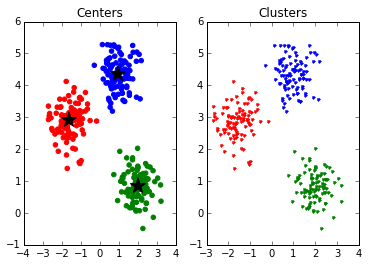

In [11]:
from sklearn.cluster import MeanShift
from sklearn.cluster import estimate_bandwidth

bandwidth = estimate_bandwidth(blobs_3)
ms        = MeanShift(bandwidth = bandwidth).fit(blobs_3)

subplot(1, 2, 1)
scatter(blobs_3[:, 0], blobs_3[:, 1], color = color_map[classes_3])
scatter(ms.cluster_centers_[:, 0],
        ms.cluster_centers_[:, 1],
        marker = '*',
        s = 250,
        color = 'black')
title('Centers')

subplot(1, 2, 2)
for k in range(min(len(ms.cluster_centers_), len(color_map))):
    plot(blobs_3[ms.labels_ == k, 0], blobs_3[ms.labels_ == k, 1], color_map[k] + '.')
title('Clusters')

## Hierarchical clustering

Hierarchical clustering es una familia genérica de algoritmos de clustering que construyen grupos anidados mediante la fusión o división sucesiva. En `AgglomerativeClustering` se utiliza un enfoque bottom-up, donde cada observación es un cluster y se estos se fusionan.

Parámetros:
* linkage
* n_clusters

Existen tres tipos de vincular:
* Ward: minimiza la suma de las diferencias al cuadrado dentro de todos los grupos.
* Average: minimiza la media de las distancias entre todos los pares de observaciones de clusters.
* Complete: minimiza la distancia máxima entre las observaciones de pares de grupos.

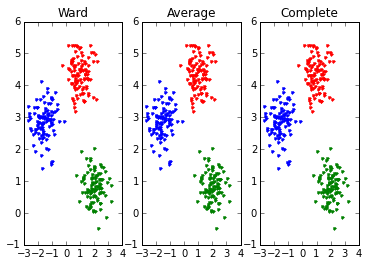

In [12]:
from sklearn.cluster import AgglomerativeClustering

ward     = AgglomerativeClustering(linkage = 'ward', n_clusters = 3).fit(blobs_3)
average  = AgglomerativeClustering(linkage = 'average', n_clusters = 3).fit(blobs_3)
complete = AgglomerativeClustering(linkage = 'complete', n_clusters = 3).fit(blobs_3)

for k in range(3):
    subplot(1, 3, 1)
    plot(blobs_3[ward.labels_ == k, 0], blobs_3[ward.labels_ == k, 1], color_map[k] + '.')  
    subplot(1, 3, 2)
    plot(blobs_3[average.labels_ == k, 0], blobs_3[average.labels_ == k, 1], color_map[k] + '.')  
    subplot(1, 3, 3)
    plot(blobs_3[complete.labels_ == k, 0], blobs_3[complete.labels_ == k, 1], color_map[k] + '.')
    
subplot(1, 3, 1)
title('Ward')
subplot(1, 3, 2)
title('Average')
subplot(1, 3, 3)
title('Complete')

## DBSCAN
El algoritmo DBSCAN ve agrupaciones como áreas de alta densidad separadas por zonas de baja densidad.

Parámetros
* eps: Es la distancia máxima entre dos muestras para que se les pueda considerar en el mismo vecindario


Número de clusters 5


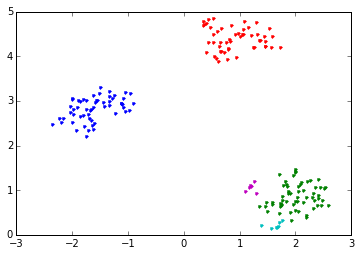

In [13]:
from sklearn.cluster import DBSCAN

db = DBSCAN(eps = 0.2).fit(blobs_3)

n_clusters_ = len(set(db.labels_)) - (1 if -1 in db.labels_ else 0)

print "Número de clusters", n_clusters_

for k in range(min(len(unique(db.labels_)), len(color_map))):
    if 0 == -1:
        plot(blobs_3[db.labels_ == k, 0], blobs_3[db.labels_ == k, 1], 'k')
    else:
        plot(blobs_3[db.labels_ == k, 0], blobs_3[db.labels_ == k, 1], color_map[k] + '.')    

## Gaussian mixtures

Un modelo de mezcla gaussiana es un modelo probabilístico que asume todos los puntos de datos se generan a partir de una mezcla de un número finito de distribuciones gaussianas con parámetros desconocidos. 

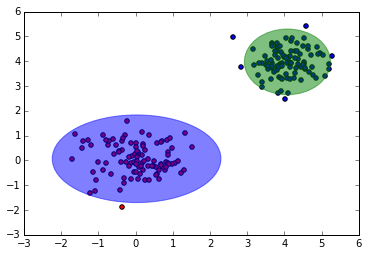

In [14]:
from sklearn.mixture import GMM

class_A = random.normal(0, 0.7, size = (100, 2))
class_B = random.normal(4, 0.5, size = (100, 2))
X       = row_stack((class_A, class_B))

gmm = GMM(n_components = 2)
gmm.fit(X)

f, ax = plt.subplots()
ax.scatter(class_A[:,0], class_A[:,1], label='A', c='r')
ax.scatter(class_B[:,0], class_B[:,1], label='B')

for n in range(gmm.n_components):
    v, w  = linalg.eigh(gmm._get_covars()[n][:2, :2])
    u     = w[0] / linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi
    v     *= 9
    ell   = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                180 + angle, color = color_map[n])
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)


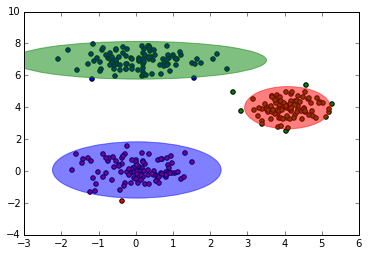

In [15]:
class_C = append(random.normal(0, 0.9, size = (100, 1)),
                 random.normal(7, 0.5, size = (100, 1)), 1)

X_2      = row_stack((X, class_C))

gmm = GMM(n_components = 3)
gmm.fit(X_2)

f, ax = plt.subplots()
ax.scatter(class_A[:,0], class_A[:,1], label='A', c = 'r')
ax.scatter(class_B[:,0], class_B[:,1], label='B', c = 'g')
ax.scatter(class_C[:,0], class_C[:,1], label='C', c = 'b')

for n in range(gmm.n_components):
    v, w  = linalg.eigh(gmm._get_covars()[n][:2, :2])
    u     = w[0] / linalg.norm(w[0])
    angle = np.arctan2(u[1], u[0])
    angle = 180 * angle / np.pi
    v     *= 9
    ell   = mpl.patches.Ellipse(gmm.means_[n, :2], v[0], v[1],
                                180 + angle, color = color_map[n])
    ell.set_clip_box(ax.bbox)
    ell.set_alpha(0.5)
    ax.add_artist(ell)

# Segmentación de imágenes

Los  modelos de clustering se pueden utilizara para la segmentación de imágenes, por ejemplo el algortimo de k-means.

## Creación de una imágen para analizar

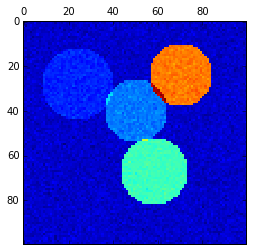

In [16]:
from sklearn.feature_extraction import image

l = 100
x, y = indices((l, l))

center1 = (28, 24)
center2 = (40, 50)
center3 = (67, 58)
center4 = (24, 70)

radius1, radius2, radius3, radius4 = 16, 14, 15, 14

circle1 = (x - center1[0]) ** 2 + (y - center1[1]) ** 2 < radius1 ** 2
circle2 = (x - center2[0]) ** 2 + (y - center2[1]) ** 2 < radius2 ** 2
circle3 = (x - center3[0]) ** 2 + (y - center3[1]) ** 2 < radius3 ** 2
circle4 = (x - center4[0]) ** 2 + (y - center4[1]) ** 2 < radius4 ** 2

img  = circle1 + 2 * circle2 + 4 * circle3 + 8 * circle4
mask = img.astype(bool)
img  = img.astype(float)

img  += 1 + 0.2 * random.randn(*img.shape)

matshow(img)

graph = image.img_to_graph(img, mask=mask)

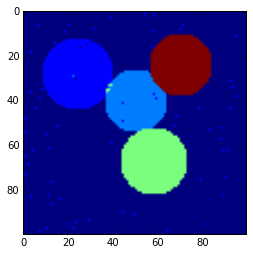

In [17]:
x, y = img.shape

long_img = img.reshape(x * y, 1)

k_means = KMeans(n_clusters = 5).fit(long_img)

imshow(k_means.cluster_centers_[k_means.labels_].reshape(x, y))

## SpectralClustering 

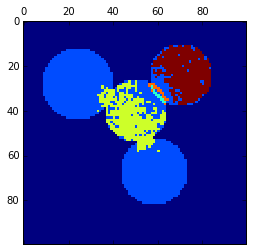

In [18]:
from sklearn.cluster import spectral_clustering

labels         = spectral_clustering(graph, n_clusters = 5)
label_im       = -np.ones(mask.shape)
label_im[mask] = labels

matshow(label_im)

# Detección de outlier

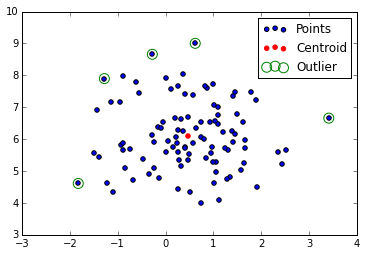

In [19]:
X, labels  = make_blobs(100, centers = 1)
kmeans     = KMeans(n_clusters = 1).fit(X)
distances  = kmeans.transform(X)
sorted_idx = argsort(distances.ravel())[::-1][:5]

scatter(X[:, 0], X[:, 1],
        label = 'Points')
scatter(kmeans.cluster_centers_[:, 0],
        kmeans.cluster_centers_[:, 1],
        label = 'Centroid',
        color = 'r')
scatter(X[sorted_idx][:, 0], X[sorted_idx][:, 1],
        label      = 'Outlier',
        edgecolors = 'g',
        facecolors = 'none',
        s          = 100)
legend(loc='best')

# Ejemplos de Clustering

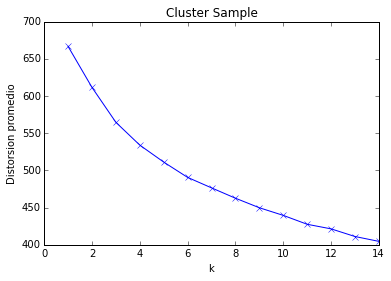

In [20]:
import pandas as pd
from sklearn.cluster import KMeans

cluster = pd.read_csv('clustering_data.csv', sep = ',')

# Identificación del número de cluster
plot_distorsion(cluster, 'Cluster Sample', max_k = 15, n_init = 30)

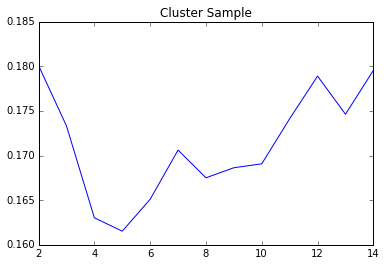

In [21]:
# Identificación del número de cluster
plot_sillhouette(cluster, 'Cluster Sample', max_k = 15, n_init = 30)

In [22]:
kmeans = KMeans(n_clusters = 7, n_init = 10).fit(cluster)

pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4,5
0,900.044118,543.323529,523.529412,441.661765,732.632353,879.102941
1,903.150685,464.917808,584.109589,496.753425,226.041096,882.808219
2,374.400000,277.294118,599.294118,250.894118,722.211765,493.823529
3,383.018349,650.183486,289.513761,249.605505,296.541284,533.844037
4,394.282353,549.317647,192.317647,781.670588,499.023529,528.717647
5,391.247191,243.617978,721.550562,669.078652,342.898876,520.213483
6,404.597938,790.278351,763.309278,610.432990,643.597938,512.185567


In [23]:
kmeans = KMeans(n_clusters = 3, n_init = 10).fit(cluster)

pd.DataFrame(kmeans.cluster_centers_)

,0,1,2,3,4,5
0,375.669643,562.223214,255.732143,472.776786,390.696429,536.441964
1,395.334746,467.351695,752.029661,531.788136,587.283898,497.254237
2,896.150685,507.691781,551.917808,470.047945,474.520548,875.308219
